In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path_to_file = 'transaction_data.csv'

In [3]:
path_to_update = 'transaction_data_updated.csv'

In [4]:
transactions = pd.read_csv(path_to_file)

In [5]:
updated_transactions = pd.read_csv(path_to_update)

In [6]:
transactions.shape

(5315, 3)

In [7]:
transactions.dtypes

date           object
name           object
transaction    object
dtype: object

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [9]:
transactions.isnull().sum().sum()

0

In [10]:
transactions.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [11]:
# Check what values the transaction column takes
# How many observations belong to one level or another? Visualize the result with a barplot.

<AxesSubplot:xlabel='transaction', ylabel='count'>

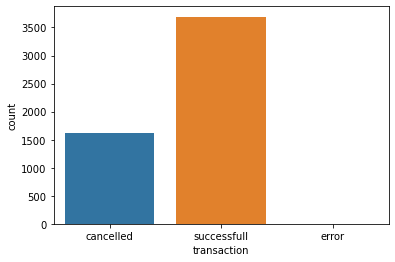

In [12]:
sns.countplot(x='transaction', data=transactions)

In [13]:
# How many errors happened?
transactions.groupby('transaction').agg({'date': 'count'})

,date
transaction,
cancelled,1619
error,4
successfull,3692


In [14]:
# How many transactions did each user make?
successfull_trans = transactions.query('transaction == "successfull"') \
        .groupby('name', as_index=False) \
        .agg(count=('date', 'count'))

In [15]:
successfull_trans['proportion'] = successfull_trans['count'] / successfull_trans['count'].sum()

<AxesSubplot:xlabel='count', ylabel='proportion'>

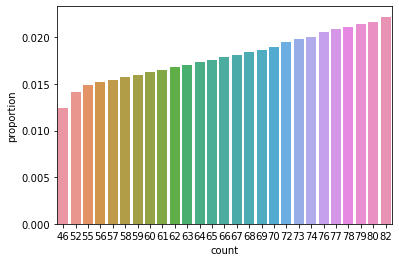

In [16]:
sns.barplot(x='count', y='proportion', data=successfull_trans)

In [19]:
# Build a pivot table with updated data
user_vs_minute = updated_transactions.groupby(['name', 'minute'], as_index=False).agg({'transaction': 'count'})
user_vs_minute_pivot = user_vs_minute.pivot(index='minute', columns='name', values='transaction')
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)
user_vs_minute_pivot.head(5)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [20]:
# Find the error in data and fix it
updated_transactions.date = pd.to_datetime(updated_transactions.date)

In [21]:
updated_transactions['true_minute'] = updated_transactions.date.dt.hour * 60 + updated_transactions.date.dt.minute

In [120]:
updated_success_operations = updated_transactions.groupby('true_minute',as_index=False).agg({'transaction':'count'})
updated_success_operations

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


<AxesSubplot:xlabel='true_minute', ylabel='transaction'>

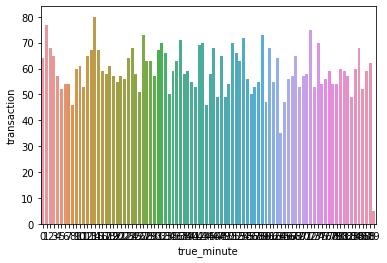

In [121]:
sns.barplot(x='true_minute', y='transaction', data=updated_success_operations)